# D: Web Scraping

Para introducir este tema haremos uso de [una presentación (PDF)](./ficherosAuxiliares/webScrapingAstronomia.pdf).

[![](./ficherosAuxiliares/portadaWebScraping.jpg)](./ficherosAuxiliares/webScrapingAstronomia.pdf)

## Scraping Básico
### Descargando páginas web

El primer paso antes de hacer cualquier tipo de scraping es decidir que página queremos descargar y analizar. En nuestro caso vamos a obtener datos de la página del Instituto Carlos III sobre la evolución del COVID-19:

https://covid19.isciii.es/  - La reemplazamos por https://zerjio.com/temp/covid19.html

Lo primero que deberíamos hacer sería visualizar la página en nuestro navegador favorito (¿Firefox?) para comprobar el aspecto que tiene y la información que podemos descargar.

A continuación tendremos que emular el comportamiento del navegador para obtener la página: tendremos que hacer una petición HTTP para recuperar la página web. Lo haremos usando la biblioteca "requests".

Información y ejemplos sobre dicho módulo: https://www.w3schools.com/python/module_requests.asp

In [1]:
import requests
from pprint import pprint

#respuesta = requests.get("https://covid19.isciii.es/")  # Utilizamo el metodo GET del protocolor HTTP
respuesta = requests.get("https://zerjio.com/temp/covid19.html")                                                     

In [2]:
# Hemos obtenido un objeto de tipo "Response", donde estará toda la información que hemos obtenido de la página
# https://www.w3schools.com/python/ref_requests_response.asp

pprint(vars(respuesta))  # Podemos inspeccionar el objeto y ver que campos nos interesan. Particularmente:


{'_content': b' <html xmlns="http://www.w3.org/1999/xhtml">\n   <head>\n   \n '
             b'   <meta charset="UTF-8">\n\n    <script>\n    function cambiaD'
             b'atosConJavascript() {\n      table = document.getElementById('
             b'"tablaDatos");\n      \n      for (var i = 0, row; row = table'
             b'.rows[i]; i++) {\n        if (i > 0) {\n          for (var j ='
             b' 0, col; col = row.cells[j]; j++) {\n            if (j > 0) {'
             b'\n              col.innerHTML = Math.floor(Math.random() * 10'
             b'00);\n            }\n          }  \n        }\n      }\n    }'
             b'\n    </script>\n    <title>P\xc3\xa1gina del COVID 19 para solv'
             b'entar problema en el curso de Python, m\xc3\xb3dulo de web-scr'
             b'apping</title>\n   </head>\n   \n   <body onload="cambiaDatosCo'
             b'nJavascript()">\n     <h2>Esta p\xc3\xa1gina "simula" una p'
             b'\xc3\xa1gina que hab\xc3\xada en el dir

In [3]:
print(respuesta.status_code)   # El código de estado: 200 Es el código de que todo ha ido bien. 
                               # Lista de códigos de estados posibles: https://www.restapitutorial.com/httpstatuscodes.html
    
print(respuesta.reason)        # Una descripción textual del código de respuesta  


print(respuesta.elapsed)       # Tiempo que se ha tardado desde que se hizo la petición hasta que se obtuvo la respuesta


print(respuesta.encoding)      # La codificación del documento (juego de caracteres usado)


200
OK
0:00:00.989867
ISO-8859-1


In [4]:
print(respuesta.content)     # Y lo que probablemente nos interesa más: el CONTENIDO de la página.
                             # El "problema" es que es una cadena "binaria".

b' <html xmlns="http://www.w3.org/1999/xhtml">\n   <head>\n   \n    <meta charset="UTF-8">\n\n    <script>\n    function cambiaDatosConJavascript() {\n      table = document.getElementById("tablaDatos");\n      \n      for (var i = 0, row; row = table.rows[i]; i++) {\n        if (i > 0) {\n          for (var j = 0, col; col = row.cells[j]; j++) {\n            if (j > 0) {\n              col.innerHTML = Math.floor(Math.random() * 1000);\n            }\n          }  \n        }\n      }\n    }\n    </script>\n    <title>P\xc3\xa1gina del COVID 19 para solventar problema en el curso de Python, m\xc3\xb3dulo de web-scrapping</title>\n   </head>\n   \n   <body onload="cambiaDatosConJavascript()">\n     <h2>Esta p\xc3\xa1gina "simula" una p\xc3\xa1gina que hab\xc3\xada en el direcci\xc3\xb3n https://covid19.isciii.es/ . Aunque no se parece est\xc3\xa9ticamente tiene los mismos elementos para que los ejemplos funcionen igual.</h2>\n     \n     <p>\xc3\x9altima actualizaci\xc3\xb3n <span id="f

In [5]:
html = respuesta.content.decode("UTF-8")   # Lo podemos codificar a una cadena "normal"

print(html)

 <html xmlns="http://www.w3.org/1999/xhtml">
   <head>
   
    <meta charset="UTF-8">

    <script>
    function cambiaDatosConJavascript() {
      table = document.getElementById("tablaDatos");
      
      for (var i = 0, row; row = table.rows[i]; i++) {
        if (i > 0) {
          for (var j = 0, col; col = row.cells[j]; j++) {
            if (j > 0) {
              col.innerHTML = Math.floor(Math.random() * 1000);
            }
          }  
        }
      }
    }
    </script>
    <title>Página del COVID 19 para solventar problema en el curso de Python, módulo de web-scrapping</title>
   </head>
   
   <body onload="cambiaDatosConJavascript()">
     <h2>Esta página "simula" una página que había en el dirección https://covid19.isciii.es/ . Aunque no se parece estéticamente tiene los mismos elementos para que los ejemplos funcionen igual.</h2>
     
     <p>Última actualización <span id="fecha">10 de Marzo de 2020</span> a las
     <span id="hora">10:10</span></p>
     
     
  

In [6]:
# Podemos guardar el código HTML a un fichero local para poder inspeccionarlo con más tranquilidad

text_file = open("salidas/covid-19.html", "w")
text_file.write(html)
text_file.close()

In [7]:
# También puede ser interesante usar el iterador que te permite recorrer el contenido obtenido línea a línea
for num, linea in enumerate(respuesta.iter_lines(), start=1):
  print("Línea %d: %s" % (num, linea.decode("UTF-8")) )

Línea 1:  <html xmlns="http://www.w3.org/1999/xhtml">
Línea 2:    <head>
Línea 3:    
Línea 4:     <meta charset="UTF-8">
Línea 5: 
Línea 6:     <script>
Línea 7:     function cambiaDatosConJavascript() {
Línea 8:       table = document.getElementById("tablaDatos");
Línea 9:       
Línea 10:       for (var i = 0, row; row = table.rows[i]; i++) {
Línea 11:         if (i > 0) {
Línea 12:           for (var j = 0, col; col = row.cells[j]; j++) {
Línea 13:             if (j > 0) {
Línea 14:               col.innerHTML = Math.floor(Math.random() * 1000);
Línea 15:             }
Línea 16:           }  
Línea 17:         }
Línea 18:       }
Línea 19:     }
Línea 20:     </script>
Línea 21:     <title>Página del COVID 19 para solventar problema en el curso de Python, módulo de web-scrapping</title>
Línea 22:    </head>
Línea 23:    
Línea 24:    <body onload="cambiaDatosConJavascript()">
Línea 25:      <h2>Esta página "simula" una página que había en el dirección https://covid19.isciii.es/ . A

### Bajando ficheros binarios

Normalmente las páginas web están escritas en ```HTML``` que es tipo de fichero de texto (string) fácil de manejar. Sin embargo en ocasiones querremos bajar ficheros que estén en otros formatos que no sean texto (binarios), como son los formatos ```PDF```, ```EXE```, ```ZIP```, ```JPG```.

En una sección anterior del curso se planteó un script para bajar el BOP de Granada y luego sacar información del ```PDF```. A continuación vamos a "refinar" el script que se creó simplificando y aprovechando alguna información que nos ofrece el protocolo ```HTTP```.


In [8]:
import datetime
import requests

baseURL="https://bop2.dipgra.es/opencms/opencms/portal/DescargaPDFBoletin?fecha="

fecha = datetime.datetime.now()
#fecha = datetime.datetime(2020, 5, 6)  # Año, mes, día, para una fecha que no sea hoy
print(fecha)

fechaFormateada = fecha.strftime("%d/%m/%Y")  # Formateamos la fecha, https://www.programiz.com/python-programming/datetime/strftime
print(fechaFormateada)

url = baseURL + fechaFormateada
print(url)

2022-04-30 00:29:25.965291
30/04/2022
https://bop2.dipgra.es/opencms/opencms/portal/DescargaPDFBoletin?fecha=30/04/2022


In [9]:
respuesta = requests.get(url)  # hacemos la petición y se descargan los contenidos

In [10]:
print("Cabeceras recibidas: " + str(respuesta.headers) + "\n") # Inspeccionamos las cabeceras que hemos recibido

# Nos interesa ver que "Content-Type" ya nos indica que es un fichero que puede abrirse con una aplicación 
# que maneje PDFs
# Además en alguna ocasión podemos recibir que el tamaño del contenido descargado: "Content-Length"

print("Tipo de información descargada: " + respuesta.headers['Content-Type'] + "\n")

tamanioDescargado = 0
if "Content-Length" in respuesta.headers:
    tamanioDescargado = int(respuesta.headers['Content-Length'])
else:
    tamanioDescargado = len(respuesta.content)  # Si no nos lo dice la cabecera podemos mirar el tamaño del
                                                # contenido descargado
        
    
print("Tamaño descargado: " + str(tamanioDescargado) + " bytes\n")

# Además nos damos cuenta que la aplicación web nos sugiere un nombre para el fichero que vamos a descargar:

print("Campo que nos sugiere el nombre del fichero descargado: " + respuesta.headers['Content-disposition'] + "\n")

# En la aplicación web que sirve los BOP de Granada siempre devuelve una respuesta válida (código 200)
# aunque no exista el PDF de la fecha pedida. En una aplicación bien hecha devolvería un codigo de error distinto
# (NOT FOUND o similar). En cualquier caso nosotros nos hemos dado cuenta que si el contenido devuelto es 0 bytes
# es que ese día no hay BOP.

if tamanioDescargado == 0:
    print("En la fecha indicada no hay BOP (o es una fecha incorrecta).\n")
else:
    
    filename = "salidas/" + respuesta.headers['Content-disposition'][20:] # Saco el nombre del fichero truncando la cadena
    
    myfile = open(filename,'wb')
    myfile.write(respuesta.content)
    myfile.close()
    
    print("Fichero " + filename + " grabado en disco.\n")

Cabeceras recibidas: {'Date': 'Fri, 29 Apr 2022 22:29:56 GMT', 'Content-disposition': 'attachment;filename=Boletin_20220430.pdf', 'Content-Type': 'application/pdf', 'Content-Length': '0', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive'}

Tipo de información descargada: application/pdf

Tamaño descargado: 0 bytes

Campo que nos sugiere el nombre del fichero descargado: attachment;filename=Boletin_20220430.pdf

En la fecha indicada no hay BOP (o es una fecha incorrecta).



### Solucionando un problema común: requests.exceptions.SSLError 

Al intentar hacer scraping a algunas páginas web puede que nos salte una excepción del tipo ```requests.exceptions.SSLError```. Ese problema viene derivado de una mala configuración del servidor web (no es problema nuestro): Básicamente no tiene actualizado el certificado digital necesario para establecer una conexión segura. En realidad la explicación es más técnica, pero basta con saber eso para reconocer el error. La solución es "fácil": solo tenemos que decirle al módulo ```requests``` que no haga comprobaciones del certificado digital. Con eso podremos proceder con la descarga, aunque en teoría es "peligroso", porque no podemos tener certeza de que el contenido que bajemos sea legítimo (podrían haber crackeado la web que consultamos, cosa no muy común). Para conseguir solucionar esto solo hay que añadir el parámetro ```verify=False``` en nuestra llamada ```requests.get(...)```. Eso sí, cuando desactivemos la comprobación de certificados nos aparecerá un ```Warning``` avisándonos de los "peligros" de no poder comprobarlos. Por ejemplo:

In [11]:
respuesta = requests.get("https://zerjio.com/temp/covid19.html", verify=False)  

/home/zerjillo/anaconda3/envs/cursoAstronomia/lib/python3.8/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'zerjio.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


## Parseando páginas web: trabajar con el ```HTML```

Dentro de la cadena del código HTML podemos buscar la información que nos interese recuperar. Podemos hacerlo de múltiples maneras. Empezaremos con algunas muy básicas y rudimentarias e iremos poco a poco mejorando la manera de acceder.

### Opción 1: Buscaremos a lo "bestia" con las funciones de búsqueda de cadenas básicas: ```str.find()```

https://www.journaldev.com/23666/python-string-find

Revisando el código de la página encontramos la fecha de actualización de la misma:

    ...
    <span style="font-size:0.9vw"> [Actualizado a <span id="fecha">10 de Marzo de 2020</span> a las <span id="hora">10:10</span> horas]<br>Basada en  la notificación diaria de casos  agregados de COVID-19 al Ministerio de Sanidad
    ...
    
Y nos percatamos que la fecha en formato texto va encerrada entre: ```<span id="fecha">``` y ```</span>```. Busquémosla


In [12]:
import requests                                         # Estas lineas las hemos copiado del anterior Notebook
respuesta = requests.get("https://zerjio.com/temp/covid19.html")  # Esta página reemplaza la anterior
html = respuesta.content.decode("UTF-8")                #    https://covid19.isciii.es/


cadenaBuscada = '<span id="fecha">'
posicionInicio = html.find(cadenaBuscada) + len(cadenaBuscada)
posicionFinal = html.find('</span>', posicionInicio)    # El segundo parámetro de find() es la posición desde
                                                        # donde empezar a buscar el primer parámetro

fecha = html[posicionInicio:posicionFinal]

print(fecha)

# Vamos a hacer lo mismo con la hora

cadenaBuscada = '<span id="hora">'
posicionInicio = html.find(cadenaBuscada) + len(cadenaBuscada)
posicionFinal = html.find('</span>', posicionInicio)

hora = html[posicionInicio:posicionFinal]

print(hora)

10 de Marzo de 2020
10:10


### Opción 2: Usando expresiones regulares

Las expresiones regulares nos permiten mucha expresividad para localizar elementos dentro de una cadena. Sin embargo en ocasiones su uso puede ser complejo en un documento ```HTML```. Información interesante sobre las expresiones regulares:

https://docs.python.org/3/library/re.html

https://www.w3schools.com/python/python_regex.asp

https://www.guru99.com/python-regular-expressions-complete-tutorial.html

https://www.programiz.com/python-programming/regex

Herramienta online para testear expresiones regulares (seleccionar lenguaje ```Python```):

https://regex101.com/

In [13]:
# Recuperemos la fecha y hora con expresiones regulares.
# Usaremos el módulo "regex":
#   > conda install -c conda-forge regex

import regex as re

fecha = re.search(r'<span id=\"fecha\">(.*)</span>', html).group(1)
hora = re.search(r'<span id="hora">(.*)</span>', html).group(1)

print("%s - %s" % (fecha, hora))


10 de Marzo de 2020 - 10:10


In [14]:
# Cuidado con las busquedas "exhaustivas". 
# Por ejemplo, podemos estar tentados a hacer una búsqueda de todas las fechas, por si hay más de una:

fecha = re.search(r'<span id="fecha">(.*)</span>', html, re.DOTALL).group(1)

print(fecha)

10 de Marzo de 2020</span> a las
     <span id="hora">10:10</span></p>
     
     
     <table style="border: 1px solid #000000;">
      <tbody>
        <tr><td>Dato 1</td><td>33</td></tr>
        <tr><td>Dato 2</td><td>666</td></tr>
        <tr><td>Dato 3</td><td>7777</td></tr>
        <tr><td>Dato 4</td><td>99</td></tr>
      
      </tbody>
    </table>
        
    <p>La que viene a continuación es la tabla de datos de verdad.</p>
    
    
     <table style="border: 1px solid #000000;" id="tablaDatos">
       <thead>
         <tr>
           <th>Comunidad</th>
           <th>Contagiados</th>
           <th>Fallecidos</th>
           <th>Curados</th>
        </tr>
      </thead>
      
      <tbody>
         <tr>
           <td>Andalucía</td>
           <td>80</td>
           <td></td>
           <td></td>
        </tr>
        
         <tr>
           <td>Aragón</td>
           <td>50</td>
           <td></td>
           <td></td>
        </tr>
        
         <tr>
           <

### Opción 3: Usando un parser DOM

_**D**ocument **O**bject **M**odel_ es una interfaz que permite manejar ficheros ```XML``` (y derivados, como ```HTML```) mediante objetos que se encuentran en memoria formando una estructura de árbol (replicando la estructura de las etiquetas). Las interfaces ```DOM``` son normalmente mucho más cómodas e intuitivas de usar que otras alternativas, aunque no funcionan bien para ficheros muy grandes. A continuación veremos unos pocos ejemplos de bibliotecas y herramientas que funcionan con este tipo de interfaz.

#### MiniDOM
Ejemplo de uso de minidom (no es bueno para ```HTML``` que suele no estar bien formado, solo para ```XML```). Por eso vamos a usar un fichero ```RSS``` de noticias

Documentacion de la biblioteca: https://docs.python.org/3.3/library/xml.dom.minidom.html

In [15]:
import xml.dom.minidom

url = 'http://ep00.epimg.net/rss/elpais/portada.xml'
rss = requests.get(url).content.decode("UTF-8")

dom = xml.dom.minidom.parseString(rss)

# Obtenemos todas las etiquetas "item"
items = dom.getElementsByTagName("item")

# Para cada etiqueta mostraremos el título de la noticia asociada y la url de la imagen asociada (si la tiene)
for item in items:
    titulo = item.getElementsByTagName("title")
    
    print(" + " + titulo[0].firstChild.nodeValue)   # Detalle "peliagudo", el texto de dentro de una etiqueta 
                                                    # es considerado un hijo. De hecho una etiqueta puede tener
                                                    # varios hijos de "texto". Ejemplo:
                                                    # <etiquetaConTexto>
                                                    #   Esto es texto
                                                    #   <etiquetaHijo />
                                                    #   Más texto
                                                    # </etiquetaConTexto>
                                                    #
                                                    # El elemento "etiquetaConTexto" tiene tres hijos:
                                                    #    + Hijo 1: de tipo texto: "\n  Esto es texto\n  "
                                                    #    + Hijo 2: etiqueta "etiquetaHijo"
                                                    #    + Hijo 3: de tipo texto: "\n  Más text\n  "

# En este ejemplo, las urls de las imágenes asociadas a un item están en la etiqueta "enclosure", atributo "url":

    enclosures = item.getElementsByTagName("enclosure")
    
    for e in enclosures:
        print("   - " + e.getAttribute('url'))

 + Un periodista que viajó a Milán para cubrir el Valencia-Atalanta, positivo por coronavirus
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/27/actualidad/1582795523_075914_1582795972_miniatura_normal.jpg
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/27/actualidad/1582795523_075914_1582795972_noticia_normal.jpg
 + Mapa de la expansión y claves para entender el coronavirus de Wuhan
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582712658_011286_1582742390_miniatura_normal.png
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582712658_011286_1583145456_portadilla_normal.png
 + El turismo italiano se resiente; España mira expectante
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582751511_964259_1582759340_miniatura_normal.jpg
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582751511_964259_1582759340_noticia_normal.jpg
   - https://elpaisfs.prisasd.com/elpaistop/multimedia/20202/27/f6f9861

#### ```DOM``` parser ```lxml.etree```

Esta ```API``` es más sencilla y está más adaptada a ```Python```:

+ Los elementos son listas (con lo que podemos acceder a sus hijos por índices)
+ Permite fácilmente modificar los elementos del ```DOM``` (lo mismo no es muy útil si estamos solo obteniendo información, pero vete tu a saber).
+ Los atributos de un elemento son un diccionario que está en elemento.attrib, con lo que acceder a ellos es muy "natural".


Tutorial: https://lxml.de/tutorial.html

Para instalar el módulo:

```
> conda install -c anaconda lxml
```

In [16]:
# Repetimos el ejercicio anterior pero con el parser DOM lxml.etree
from lxml import etree

tree = etree.parse(url)

raiz = tree.getroot()

# Iteramos por todos los descendientes de raiz que sean "item"

for item in raiz.iter("item"):
    for hijo in item.iter("title"):
        print(" + " + hijo.text)
    
    for hijo in item.iter("enclosure"):
        print("   - " + hijo.attrib['url'])
    

 + Un periodista que viajó a Milán para cubrir el Valencia-Atalanta, positivo por coronavirus
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/27/actualidad/1582795523_075914_1582795972_miniatura_normal.jpg
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/27/actualidad/1582795523_075914_1582795972_noticia_normal.jpg
 + Mapa de la expansión y claves para entender el coronavirus de Wuhan
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582712658_011286_1582742390_miniatura_normal.png
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582712658_011286_1583145456_portadilla_normal.png
 + El turismo italiano se resiente; España mira expectante
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582751511_964259_1582759340_miniatura_normal.jpg
   - https://ep00.epimg.net/sociedad/imagenes/2020/02/26/actualidad/1582751511_964259_1582759340_noticia_normal.jpg
   - https://elpaisfs.prisasd.com/elpaistop/multimedia/20202/27/f6f9861

### Opción 4: Usando ```XPath``` para localizar elementos fácilmente

```XPath``` (*XML Path Language*) es un lenguaje que permite construir expresiones que recorren y procesan un documento ```XML```. Permite buscar y seleccionar teniendo en cuenta la estructura jerárquica del ```XML```.

+ https://es.wikipedia.org/wiki/XPath
+ https://www.w3schools.com/xml/xpath_syntax.asp

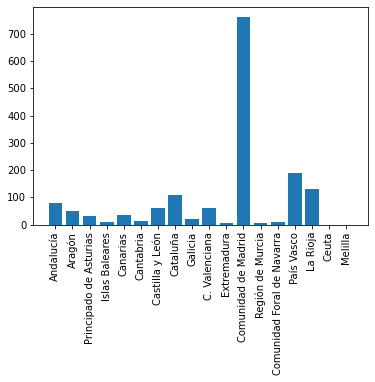

In [17]:
# Replicaremos el ejemplo de la gráfica de casos de COVID-19 de manera mucho más simple
from lxml import etree
from io import StringIO, BytesIO
import matplotlib.pyplot as plt

parserHTML = etree.HTMLParser()

# Recuerda que html se inicializó mucho antes con el contenido de la página https://covid19.isciii.es/
tree = etree.parse(StringIO(html), parserHTML)

tablas = tree.xpath('//table')  # Nos devuelve todos los elementos "table" en cualquier sitio del documento
                                # En nuestro caso habrá devuelto 2 tablas

# Nos interesa la segunda tabla de la página 
tabla = tablas[1]

comunidades = []
casos = []

filas = tabla.xpath('tbody/tr')  # Buscamos todos los <tr> que estén dentro de <tbody> en la tabla

for f in filas:
    comunidades.append(f[0].text)
    casos.append(int(f[1].text))
    
    
# Creamos el gráfico de barras
plt.bar(comunidades, casos)
# Rotation of the bars names
plt.xticks(rotation=90)
# Show graphic
plt.show()

***
**Ejercicio D.1:** Obtener un campo del Sloan Digital Sky Survey (SDSS)

El [SDSS](https://www.sdss.org/) tiene multitud de herramientas que permiten la obtención de datos e imágenes del cielo. Por ejemplo en https://dr12.sdss.org/fields/ podemos descargar campos concretos utilizando las coordenadas del cielo que nos interesan. Jugando un poco con el formulario de esa página "descubrimos" que podemos obtener el campo mediante el uso de la siguiente URL que tiene como parámetros la ascension recta (ra) y la declinación (dec):

https://dr12.sdss.org/fields/raDec?ra=250.423475&dec=36.461319

Programemos una función para descargar la imagen que corresponde a cualquier coordenada que nos interese:


In [18]:
# Tu código aquí
    
# descargaSDSS(250.423475, 36.461319, "m13.jpg")

# print("Descarga realizada")

***
**Ejecicio D.2:** Astronomy Picture of the Day (APOD) (desde la página oficial)

Queremos hacer un script que descargue la imagen astronómica del día y la ponga de fondo de escritorio.

La función de poner como fondo de escritorio depende del sistema operativo, por lo que habrá que descomentar la función ```setWallpaper``` que corresponda en el código de más abajo.

Para conseguir nuestro objetivo tendremos que descargar la página del APOD y analizar el código ```HTML``` para dar con la URL de la imagen que queremos descargar.

In [19]:
#import dbus       # conda install -c conda-forge dbus-python   SOLO PARA Linux / KDE

# Para Linux con KDE
#def setWallpaper(filepath):
#    plugin = 'org.kde.image'
#    jscript = """
#    var allDesktops = desktops();
#    print (allDesktops);
#    for (i=0;i<allDesktops.length;i++) {
#        d = allDesktops[i];
#        d.wallpaperPlugin = "%s";
#        d.currentConfigGroup = Array("Wallpaper", "%s", "General");
#        d.writeConfig("Image", "file://%s")
#    }
#    """
#    bus = dbus.SessionBus()
#    plasma = dbus.Interface(bus.get_object('org.kde.plasmashell', '/PlasmaShell'), dbus_interface='org.kde.PlasmaShell')
#    plasma.evaluateScript(jscript % (plugin, plugin, filepath))
    
# Para Linux con Gnome
# def setWallpaper(filepath):
#     os.system("gsettings set org.gnome.desktop.background picture-uri file://" + filepath)

# Para Windows
# import ctypes
# ctypes.windll.user32.SystemParametersInfoW(20,0,"Path_wallpaper", 0) 

# Para Mac
# Ni idea, habría que buscarlo

#setWallpaper("/home/zerjillo/esfera.jpg")   # Cambiar la direccion a la ruta absoluta de una imagen

# Tu código aquí

***
## Haciendo peticiones ```http``` más "complejas"

Hasta ahora las peticiones que hemos realizado para hacer scraping son simples llamadas ```GET``` a URLs concretas. Sin embargo en algunas ocasiones (por ejemplo cuando nos encontremos páginas en las que tenemos que interaccionar con formularios) o cuando queramos interactuar con una ```API``` es posible que necesitemos hacer peticiones con otro verbo ```http``` diferente o incluso mandar parámetros.

La siguiente página:

https://www.mscbs.gob.es/buscador/iniciar.do

nos permite hacer búsquedas en la web del Ministerio de Sanidad, Consumo y Bienestar Social. Si quisieramos scrapear la página de búsquedas podemos inspeccionar el código _HTML_ de la misma y localizar el formulario:

```
<form id="formBuscador" method="post" action="iniciar.do">
...
    <input type="text" name="search" value="" id="searchBsq" style="width: 20em;" class="campo_texto" aria-label="Término o términos de la consulta">
    <input type="submit" value="Buscar" class="boton">
    <input type="radio" name="buscar" value="msc" id="msc" checked="checked"><span class="negrita"><label for="msc">En el Ministerio de Sanidad, Consumo y Bienestar Social</label></span>				 								 							 						
    <input type="radio" name="buscar" value="internet" id="internet"><span class="negrita"><label for="internet">En Internet</label></span>
...
</form>
```
Vemos que la petición que se realizar es con el método ```POST``` y que hay varios campos que se pueden rellenar: ```search``` (el campo de búsqueda en sí) y ```buscar``` (que es un radio button con dos opciones: ```msc``` o ```internet```). Además la petición del formulario se va a hacer a la misma página: ```action="iniciar.do"```.


In [20]:
# Ejemplo de búsqueda en la página descrita anteriormente

import requests

url = "https://www.mscbs.gob.es/buscador/iniciar.do"

parametros = {
    'search': 'COVID',  # Buscaremos el término 'COVID'
    'buscar': 'msc'     # Dentro de la página del ministerio
}

respuesta = requests.post(url, parametros)

html = respuesta.content.decode("utf-8")   

print(html)


<!DOCTYPE html>









<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="es" lang="es">
	<head>	
		<!--  Establece las cabeceras -->
		<meta charset="utf-8">
		<meta http-equiv="X-UA-Compatible" content="IE=edge">
		<meta name="viewport" content="width=device-width, initial-scale=1">
			
		<title>
			Ministerio de Sanidad  - Buscador
			
		</title>
		
			<meta name="Keywords" content="Ministerio de Sanidad, Buscador"/>
		
			
		
			<meta name="description" content="Buscador"/>
		
		
		
		<!-- CSS -->
		<link href="../diseno/css/bootstrap.min.css" rel="stylesheet">
		<link href="../diseno/css/ministerio-sanidad.css" rel="stylesheet"> 
		<link href="../diseno/css/ministerio-sanidad-general.css" rel="stylesheet">
		<link href="../diseno/css/jasny-bootstrap.min.css" rel="stylesheet">
		<link href="../diseno/css/font-awesome.min.css" rel="stylesheet">
		<link href="../diseno/css/formularios.css" rel="stylesheet">
		<link href="../diseno/css/mapa-web.css" rel="stylesheet">
		<link href=

### Beautiful Soup

Es otro parseador de páginas web muy utilizado por tener también una sintaxis sencilla y potente:

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

Para instalarlo:

```bash
> conda install -c anaconda beautifulsoup4
```

Veamos un ejemplo sobre como podemos obtener de la página anterior los títulos de los documentos que ha devuelto la búsqueda que hemos hecho.


In [21]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(html, 'html.parser')

In [22]:
print(soup.prettify())  # Simplemente nos permite ver el documento mejor formatado (indentaciones, espacios en blanco...)


<!DOCTYPE html>
<html lang="es" xml:lang="es" xmlns="http://www.w3.org/1999/xhtml">
 <head>
  <!--  Establece las cabeceras -->
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <title>
   Ministerio de Sanidad  - Buscador
  </title>
  <meta content="Ministerio de Sanidad, Buscador" name="Keywords">
   <meta content="Buscador" name="description">
    <!-- CSS -->
    <link href="../diseno/css/bootstrap.min.css" rel="stylesheet"/>
    <link href="../diseno/css/ministerio-sanidad.css" rel="stylesheet"/>
    <link href="../diseno/css/ministerio-sanidad-general.css" rel="stylesheet"/>
    <link href="../diseno/css/jasny-bootstrap.min.css" rel="stylesheet"/>
    <link href="../diseno/css/font-awesome.min.css" rel="stylesheet"/>
    <link href="../diseno/css/formularios.css" rel="stylesheet"/>
    <link href="../diseno/css/mapa-web.css" rel="stylesheet"/>
    <link href="../diseno/css/b

In [23]:
# Buscamos un <div class="capaCentroBuscador">

cuadroResultados = soup.find('div', {"class": "capaCentroBuscador"})

# De ese cuadro extraemos todos los <li> (cada uno tiene un resultado de la búsqueda)

resultados = cuadroResultados.find_all('li')

for r in resultados:
    # Dentro de cada <li> tenemos un <p> con un <a href="URL_DE_LA_NOTICIA">
    urlNoticia = r.p.a['href']
    
    tituloNoticia = r.p.a.text
    
    print(tituloNoticia)
    print(urlNoticia)

[Ministerio de Sanidad, Consumo y Bienestar Social]
https://www.mscbs.gob.es/home.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Profesionales -
Enfermedad por nuevo coronavirus, COVID
-19]
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/home.htm
[Ministerio de Sanidad, Consumo y Bienestar Social]
https://www.mscbs.gob.es/sanidad/portada/home.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Profesionales - Mapa
del estado de la expedición del Certificado COVID
 Digital de la UE en Comunidades Autónomas]
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov/ccd/ccaa.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Ciudadanos - Ciudadanos]
https://www.mscbs.gob.es/ciudadanos/portada/home.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Servicios Sociales - Imserso]
https://www.mscbs.gob.es/ssi/imserso/home.htm
[Ministerio de Sanidad, Consumo y Bienestar Social - Campañas - #EsteVirusLoParamosUnidos]
h

### Trabajando con otros formatos: ```CSV```

Sacar información de un documento ```CSV``` en principio debe ser mucho más fácil ya que es un documento que normalmente separa los datos de una tabla usando el salto de línea ```\n``` como delimitador de fila y la coma ortográfica ```,``` como separador de columnas. Sin embargo el uso de ```"``` dentro de los campos puede dificultar la división de cada línea en distintos campos. Por suerte ya tenemos funciones preparadas que son capaces de entender este formato y convertirlo a un formato más amigable para ```Python```.

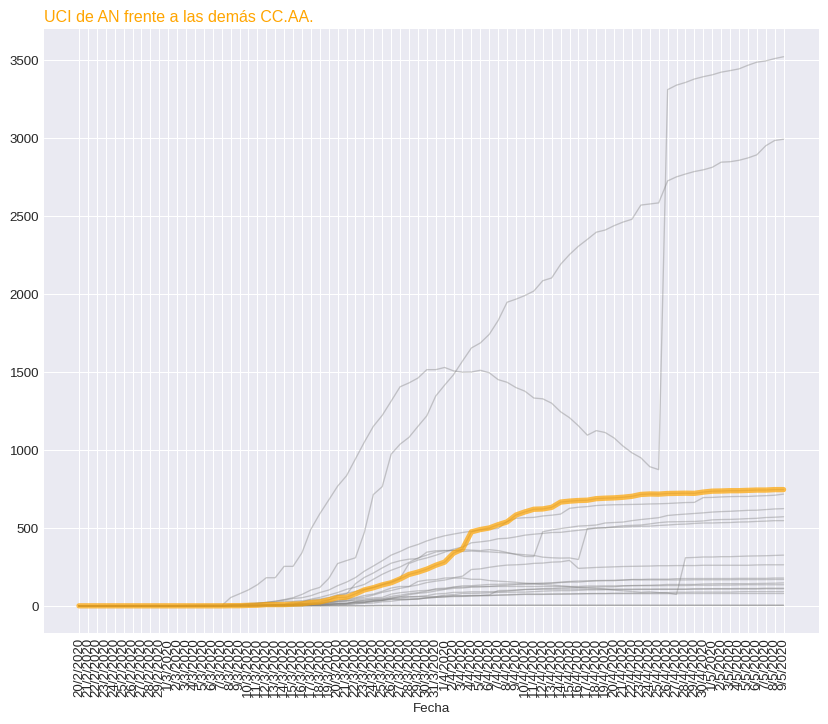

In [24]:
# Este ejemplo ha sido adaptado (Noviembre 2020) pues las columnas del fichero CSV
# han cambiado desde que se creó por primera vez

# Finalmente el fichero han dejado de servirlo en el mismo formato y la misma URL, con lo que usaremos 
# una copia alojada en https://zerjio.com/temp/covid-19.csv

import requests
from io import StringIO
import csv
import matplotlib.pyplot as plt

#url="https://covid19.isciii.es/resources/serie_historica_acumulados.csv"   # Ha dejado de funcionar!!

url="https://zerjio.com/temp/covid-19.csv"

respuesta = requests.get(url)

contenidoCSV = respuesta.content.decode("iso-8859-1")   # Lo podemos codificar a una cadena "normal"

#print(contenidoCSV)

results = []
f = StringIO(contenidoCSV)
reader = csv.reader(f, delimiter=',')

fila = 0

for row in reader: # each row is a list
    if fila != 0:  # Ignoramos la primera fila porque es el nombre de las columnas
        results.append(row)
        
    fila += 1
        
results = results[:-8]  # Eliminamos las 8 ultimas filas porque es un texto que no tiene que ver con los datos


#print(results)

# Ahora que tenemos los datos vamos a hacer unas gráficas

# Recorremos los resultados creando estructuras de datos más comodas para los gráficos

ccaa = []
fechas = []
casosTotales = {}
pcr = {}
testAC = {}
hospitalizados = {}
uci = {}
fallecidos = {}


for r in results:
    comunidad = r[0]
    fecha = r[1]
    t = 0 if not r[2] else int(r[2])
    p = 0 if not r[3] else int(r[3])
    a = 0 if not r[4] else int(r[4])
    h = 0 if not r[5] else int(r[5])
    u = 0 if not r[6] else int(r[6])
    f = 0 if not r[7] else int(r[7])

    if not comunidad in ccaa:
        ccaa.append(comunidad)
        
        casosTotales[comunidad] = []
        pcr[comunidad] = []
        testAC[comunidad] = []
        hospitalizados[comunidad] = []
        uci[comunidad] = []
        fallecidos[comunidad] = []

    if not fecha in fechas:
        fechas.append(fecha)
        
    casosTotales[comunidad].append(t)
    pcr[comunidad].append(p)
    testAC[comunidad].append(a)
    hospitalizados[comunidad].append(h)
    uci[comunidad].append(u)
    fallecidos[comunidad].append(f)
    
    
variableGrafica = uci
variableTexto = "UCI"
comunidadResaltada = "AN"

#print(ccaa)
#print(fechas)
#print(fallecidos['AN'])

plt.style.use('seaborn-darkgrid')
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 800/my_dpi), dpi=my_dpi)

for comunidad in ccaa:
   plt.plot(fechas, variableGrafica[comunidad], marker='', color='grey', linewidth=1, alpha=0.4)
 
plt.plot(fechas, variableGrafica[comunidadResaltada], marker='', color='orange', linewidth=4, alpha=0.7)


plt.title(variableTexto + " de " + comunidadResaltada + " frente a las demás CC.AA.", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Fecha")
plt.ylabel("")
plt.xticks(range(0, len(fechas), 1), fechas, rotation=90)


plt.show()

### Trabajando con otros formatos: ```JSON```

Este formato se ha popularizado sobretodo para _APIs_ de Internet. Por ejemplo, el servicio gratuito _Nominatim_ permite hacer búsquedas de latitudes y longitudes a partir de consultas de texto habituales. Por ejemplo, podemos encontrar la latitud y la longitud de un edificio o de una calle:

https://nominatim.org/release-docs/develop/

Tal y como se nos dice en la documentación, para hacer una consulta tenemos varios parámetros que le podemos pasar a la petición de la página:

https://nominatim.openstreetmaps.org/search

Por ahora los parámetros que nos interesan son ```q``` donde pondremos la descripción textual de la calle o edificio que buscamos y ```format``` con el valor ```json``` para que nos de la información en este formato.

In [25]:
import requests
import json 

url = "https://nominatim.openstreetmaps.org/search"

parametros = {
    'q': 'Facultad de Ciencias',  
    'format': 'json'   
}

respuesta = requests.get(url, parametros)

textoJson = respuesta.content.decode("utf-8")   

#print(textoJson)

resultados = json.loads(textoJson)

for r in resultados:
    print("+ Nombre: " + r['display_name'])
    print("  + Coordenadas: " + "(" + r['lat'] + ", " + r['lon'] + ")")
    print("  + Tipo: " + r['type'])
    print("  + Clase: " + r['class'])
    

+ Nombre: Facultad de Ciencias, Calle Pío Baroja, Pajaritos, Beiro, Granada, Comarca de la Vega de Granada, Granada, Andalucía, 18003, España
  + Coordenadas: (37.17999345, -3.609205346264429)
  + Tipo: university
  + Clase: building
+ Nombre: Facultad de Ciencias, Plaza Nácere Hayek, San Honorato, San Cristóbal de La Laguna, Santa Cruz de Tenerife, Canarias, 38203, España
  + Coordenadas: (28.4818431, -16.3208461)
  + Tipo: university
  + Clase: amenity
+ Nombre: Facultad de Ciencias, 31, Bulevar Louis Pasteur, Teatinos-Universidad, Málaga, Málaga-Costa del Sol, Málaga, Andalucía, 29071, España
  + Coordenadas: (36.71546255, -4.472932651733137)
  + Tipo: university
  + Clase: building
+ Nombre: Facultad de Ciencias, 7, Paseo de Belén, San Pedro Regalado, Valladolid, Castilla y León, 47011, España
  + Coordenadas: (41.6635038, -4.705784440176778)
  + Tipo: university
  + Clase: building
+ Nombre: Facultad de Ciencias, Avenida de Francisco Tomás y Valiente, El Goloso, Fuencarral-El Pard

Obviamente ```Python``` tiene tambien mecanismos sencillos para convertir una estructura de datos como listas o diccionarios en una cadena de texto tipo ```JSON``` que podemos grabar en un archivo:

In [26]:
import json

planetas = [
    {'nombre': 'Mercurio',
     'distanciaSol': 0.39,
     'terrestre': True
    },
    {'nombre': 'Venus',
     'distanciaSol': 0.72,
     'terrestre': True
    },
    {'nombre': 'Tierra',
     'distanciaSol':1.0,
     'terrestre': True
    },
    {'nombre': 'Marte',
     'distanciaSol': 1.52,
     'terrestre': True
    },
    {'nombre': 'Júpiter',
     'distanciaSol': 5.2,
     'terrestre': False
    },
    {'nombre': 'Saturno',
     'distanciaSol': 9.54,
     'terrestre': False
    },
    {'nombre': 'Urano',
     'distanciaSol': 19.19,
     'terrestre': False
    },
    {'nombre': 'Neptuno',
     'distanciaSol': 30.06,
     'terrestre': False
    },
]

print(planetas)

with open('salidas/planetas.json', 'w') as fichero:
    json.dump(planetas, fichero)

[{'nombre': 'Mercurio', 'distanciaSol': 0.39, 'terrestre': True}, {'nombre': 'Venus', 'distanciaSol': 0.72, 'terrestre': True}, {'nombre': 'Tierra', 'distanciaSol': 1.0, 'terrestre': True}, {'nombre': 'Marte', 'distanciaSol': 1.52, 'terrestre': True}, {'nombre': 'Júpiter', 'distanciaSol': 5.2, 'terrestre': False}, {'nombre': 'Saturno', 'distanciaSol': 9.54, 'terrestre': False}, {'nombre': 'Urano', 'distanciaSol': 19.19, 'terrestre': False}, {'nombre': 'Neptuno', 'distanciaSol': 30.06, 'terrestre': False}]


Posteriormente podemos cargar ese fichero también muy fácilmente:

In [27]:
import json

with open('salidas/planetas.json') as fichero:
    planetas2 = json.load(fichero)

print(planetas2)

[{'nombre': 'Mercurio', 'distanciaSol': 0.39, 'terrestre': True}, {'nombre': 'Venus', 'distanciaSol': 0.72, 'terrestre': True}, {'nombre': 'Tierra', 'distanciaSol': 1.0, 'terrestre': True}, {'nombre': 'Marte', 'distanciaSol': 1.52, 'terrestre': True}, {'nombre': 'Júpiter', 'distanciaSol': 5.2, 'terrestre': False}, {'nombre': 'Saturno', 'distanciaSol': 9.54, 'terrestre': False}, {'nombre': 'Urano', 'distanciaSol': 19.19, 'terrestre': False}, {'nombre': 'Neptuno', 'distanciaSol': 30.06, 'terrestre': False}]


***
**Ejercicio D.3:** APOD, pero usando la API de la NASA

La NASA nos ofrece [APIs](https://api.nasa.gov/) que nos permiten acceder a mucha de la información que ofrecen. Normalmente hay que obtener una clave de la ```API``` para esos menesteres. En este caso para acceder a la ```API``` básica del APOD no hace falta nada, porque con esta url: https://api.nasa.gov/planetary/apod?api_key=DEMO_KEY nos devuelve el ```JSON``` con la información pertinente del APOD.

Este método además de más simple es más robusto, puesto que la API probablemente no cambie en mucho tiempo, mientras que el ```HTML``` de la página del APOD si puede cambiar. Consigamos lo mismo que el ejercicio anterior del APOD pero a partir de la información que obtenemos de la ```API``` de la NASA.

In [28]:
# Tu código aquí

***
## Creando un Robot

Hasta ahora todo lo que hemos realizado es hacer llamadas ```HTTP``` a una única dirección y parsear su contenido. Pero sería mucho más útil si pudieramos hacer un robot algo más complejo que navegue por varias páginas de un sitio web extrayendo información.

La aproximación más fácil es cuando podemos determinar con claridad las páginas que queremos explorar. Por ejemplo en la página del Ministerio de Sanidad, Consumo y Bienestar Social, solo obtuvimos 10 resultados de la página de búsqueda, cuando había más resultados que se podían encontrar en páginas sucesivas. Mejoremos nuestro script convirtiéndolo en un robot que obtenga todos los resultados que se ofrezcan allí. Inspeccionando la página de resultados de la búsqueda comprobamos que podemos obtener otra página con diferentes añadiendo el parámetro ```sIndex```.

In [29]:
import requests
from bs4 import BeautifulSoup
import time

# Función adaptada del código anterior que buscaba solo en la primera página
def buscarDocsEnMSCBS(busqueda, sIndex=0):
    url = "https://www.mscbs.gob.es/buscador/iniciar.do"
    
    print("Buscando %s (%d)" %(busqueda, sIndex))

    parametros = {
        'search': busqueda,  
        'buscar': 'msc',    
        'sIndex': sIndex
    }

    respuesta = requests.post(url, parametros)

    html = respuesta.content.decode("utf-8")   
    soup = BeautifulSoup(html, 'html.parser')
    
    # Averiguamos el número total de resultados sacándolo de <div id="titulo_res">
    div = soup.find(id="titulo_res")
    
    if (div == None):
        return {"nResultados": 0, "articulos": []}  # No hemos encontrado nada
    
    nResultados = int(div.text.split(" ")[0])
    
    # Como en el ejemplo anterior obtenemos los títulos y URLs de los resultados
    
    cuadroResultados = soup.find('div', {"class": "capaCentroBuscador"})

    resultados = cuadroResultados.find_all('li')

    articulos = []
    
    for r in resultados:
        # Dentro de cada <li> tenemos un <p> con un <a href="URL_DE_LA_NOTICIA">
        urlNoticia = r.p.a['href']

        tituloNoticia = r.p.a.text

        articulos.append({'titulo': tituloNoticia, 'url': urlNoticia})
        
    return {"nResultados": nResultados, "articulos": articulos}

print("Introduzca lo que quiera buscar en el MSCBS:")
busqueda = input()
print("")

resultados = buscarDocsEnMSCBS(busqueda)

nResultados = resultados['nResultados']
articulos = resultados['articulos']

# Ahora tenemos que hacer búsquedas sucesivas para seguir obteniendo de 10 en 10
# el resto de artículos

for sIndex in range(10, nResultados, 10):
    time.sleep(1.0)      # Somo educados: no mandamos sucesivas peticiones sin dejar un poco
                    # de tiempo (1 segundo)
        
    resultados = buscarDocsEnMSCBS(busqueda, sIndex)
    
    articulos += resultados['articulos']
    

print("Se han encontrado %d artículos:" %(nResultados))
indice = 1

for a in articulos:
    print(str(indice) + " - " + a['titulo'])
    print("   " + a['url'])
    indice += 1
    

Introduzca lo que quiera buscar en el MSCBS:


 omicron



Buscando omicron (0)
Buscando omicron (10)
Se han encontrado 17 artículos:
1 - [Ministerio de Sanidad, Consumo y Bienestar Social - Gabinete de Prensa - Notas de Prensa]
   https://www.mscbs.gob.es/gabinete/notasPrensa.do
2 - [Ministerio de Sanidad, Consumo y Bienestar Social - Gabinete de Prensa - Notas de Prensa]
   https://www.mscbs.gob.es/gabinete/notasPrensa.do?metodo=detalle&id=5586
3 - [Ministerio de Sanidad, Consumo y Bienestar Social - Gabinete de Prensa - Notas de Prensa]
   https://www.mscbs.gob.es/gabinete/notasPrensa.do?metodo=detalle&id=5584
4 - [Ministerio de Sanidad, Consumo y Bienestar Social - Notas prensa - COVID-19]
   https://www.mscbs.gob.es/profesionales/cargarNotas.do
5 - [Notas de prensa]
   https://www.mscbs.gob.es/gabinete/notap_rss.do
6 - [Ministerio de Sanidad, Consumo y Bienestar Social - Gabinete de Prensa]
   https://www.mscbs.gob.es/gabinete/inicial.do
7 - [Ministerio de Sanidad, Consumo y Bienestar Social - Notas prensa - COVID-19]
   https://www.mscb

### Robots recursivos

En el ejemplo anterior teníamos muy claro la página que teníamos que visitar y el número de consultas que teníamos que hacer, pero en ocasiones querremos que nuestro robot rastree una web búscando el mismo la información que nos interese. Lo que se llama comúnmente una **araña**.

En el siguiente ejemplo vamos a hacer una araña que rastree un sitio de imágenes de fondo de pantalla y que vaya rastreándolo de manera recursiva, siguiendo todos los enlaces que vaya encontrando y descargando todas las imágenes que encuentre.

Pondremos ciertos límites a nuestro robot, como por ejemplo la profundidad máxima que permitiremos en las búsquedas (cuantos "saltos" como máximo podremos hacer desde la página inicial) y evitaremos también que nuestro robot se salga del sitio web que queremos explorar (siguiendo enlaces a páginas externas).


In [30]:
from urllib.parse import urlparse    # Utilizadas para parsear más fácilmente las URLs que encontremos.
from urllib.parse import urlunparse  #
from urllib.parse import urljoin     #

import requests
from bs4 import BeautifulSoup
import time
import shutil                        # Una utilidad que permite copiar ficheros facilmente
import os
import errno


retardoEntrePeticiones = 0.5

# A esta función se le pasa una URL padre "completa" (con esquema y netloc: 
# http://example.com...)
# y una "hija" que probablemente se habrá sacado de un <a href="">. La hija probablemente
# no tenga ni esquema ni netloc. Esta función se asegura de devolver la hija pero
# con el esquema y el netloc correspondientes. Si la hija ya tiene netloc la devolverá tal cual.
# Ejemplos:
#  Padre: "https://etsiit.ugr.es/pages/calendario_academico" 
#  Hija: "horariosnuevocurso"
#  Devuelve: "https://etsiit.ugr.es/pages/calendario_academico/horariosnuevocurso"
#
#  Padre: "https://etsiit.ugr.es/pages/escuela"
#  Hija: "/pages/docencia"
#  Devuelve: https://etsiit.ugr.es/pages/docencia
#  
#  Padre: "https://etsiit.ugr.es/pages/escuela"
#  Hija: "https://www.ugr.es"
#  Devuelve: "https://www.ugr.es"
# 
# Ojo, no está probada con parámetros y similares 

def getURLCompleta(padreURL, hijaURL):
    hija = urlparse(hijaURL)
    padre = urlparse(padreURL)
    
    netloc = hija.netloc
    scheme = hija.scheme
    path = hija.path
    
    if (netloc == ''):   # Si no tiene netloc, se lo añadimos
        netloc = padre.netloc
        scheme = padre.scheme
        
        path = urljoin(padre.path, hija.path)
    
    return urlunparse((scheme, netloc, path, hija.params, hija.query, hija.fragment))
    
# Devuelve True si las dos urls son del mismo servidor
def sonDelMismoServidor(url1, url2):
    url1p = urlparse(url1)
    url2p = urlparse(url2)
    
    server1 = url1p.netloc.split(".")[-2:]
    server2 = url2p.netloc.split(".")[-2:]
    
    if server1[0]==server2[0] and server1[1]==server2[1]:
        return True
    
    return False

# Crea todos los directorios necesarios en el path de un fichero
def crearDirectoriosDeUnPath(path):
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    
    

def descargaImagen(url, directorio):
    urlp = urlparse(url)
    
    nombreFichero = directorio + urlp.netloc + urlp.path
    #print(nombreFichero)
    
    if not os.path.exists(nombreFichero):  # Si ya existe es que lo descargamos en una ejecución anterior
        time.sleep(retardoEntrePeticiones)   # Dejamos un tiempo por educación

        crearDirectoriosDeUnPath(nombreFichero)

        print("Descargando imagen %s" % (url))

        resp = requests.get(url, stream=True)

        local_file = open(nombreFichero, 'wb')
    # Set decode_content value to True, otherwise the downloaded image file's size will be zero.
        resp.raw.decode_content = True
    # Copy the response stream raw data to local image file.
        shutil.copyfileobj(resp.raw, local_file)
    # Remove the image url response object.
        del resp
        
        return True
    
    return False

# Preguntamos la web a escrapear y otros parámetros
print("Inserte la URL a scrapear:")
url = input("Por ejemplo: https://wall.alphacoders.com/ ")
if url == '': url = "https://wall.alphacoders.com/"
    
print("\nMáximo nivel de profundidad en la búsqueda:")
profundidadMaxima = input("Por ejemplo: 1 ")
if profundidadMaxima == '': 
    profundidadMaxima = 1 
else: 
    profundidadMaxima = int(profundidadMaxima)

print("\nDirectorio donde guardar las imágenes:")
directorioImagenes = input("Por ejemplo: salidas/imagenes/ ")
if directorioImagenes == '':
    directorioImagenes =  "salidas/imagenes/"


# Creamos arrays para las URLs que todavía tenemos que parsear y las que ya hemos visitado
# Las visitadas las apuntamos para evitar descargar dos veces la misma URL.
urlsPendientes = [{'url' : url, 'profundidad' : 1}]
urlsVisitadas = []  
imagenesDescargadas = 0

# Mientras que queden URLs por parsear
while(len(urlsPendientes) > 0):
    x = urlsPendientes.pop()
    
    urlActual = x['url']
    profundidadActual = x['profundidad']
    
    urlsVisitadas.append(urlActual)  # Para no visitar de nuevo esta misma URL
    
    time.sleep(retardoEntrePeticiones)    # Dejamos un tiempo por educación
    
    print(f"Descargando página {urlActual}")
    
    respuesta = requests.get(urlActual)

    try:
        html = respuesta.content.decode("utf-8")   
        soup = BeautifulSoup(html, 'html.parser')


    # Si no hemos llegado al nivel de profundidad maximo, buscamos todos los enlaces y los mete
        if profundidadActual < profundidadMaxima:
            enlaces = soup.findAll('a')

            for enlace in enlaces:
                urlEnlace = enlace['href']

                if urlEnlace != '':
                    urlEnlace = getURLCompleta(urlActual, urlEnlace)

                    if sonDelMismoServidor(urlActual, urlEnlace) and not urlEnlace in urlsVisitadas and not urlEnlace in urlsPendientes:
                        #print(urlEnlace)
                        urlsPendientes.append({'url': urlEnlace, 'profundidad': profundidadActual + 1})


    # Descargamos las imágenes
        imagenes = soup.findAll('img')

        imagenesEstaPagina = len(imagenes)
        i = 0
        
        for imagen in imagenes:
            i += 1
            urlImagen = imagen['src']

            if urlImagen != '':
                urlImagen = getURLCompleta(urlActual, urlImagen)

                if not urlImagen in urlsVisitadas:
                    if descargaImagen(urlImagen, directorioImagenes):
                        print(f"Quedan {len(urlsPendientes)} páginas, imagenes descargadas {imagenesDescargadas} ({i}/{imagenesEstaPagina})")

                        imagenesDescargadas += 1
                        
                    urlsVisitadas.append(urlImagen)
                    
           
        del respuesta
    except Exception as e: 
        print(e)
        print("Problema parseando página ¿binario?")

Inserte la URL a scrapear:


Por ejemplo: https://wall.alphacoders.com/  



Máximo nivel de profundidad en la búsqueda:


Por ejemplo: 1  



Directorio donde guardar las imágenes:


Por ejemplo: salidas/imagenes/  


Descargando página https://wall.alphacoders.com/
Descargando imagen https://static.alphacoders.com/wa/English-flag.png
Quedan 0 páginas, imagenes descargadas 0 (1/94)
Descargando imagen https://static.alphacoders.com/alpha_system_360.png
Quedan 0 páginas, imagenes descargadas 1 (2/94)
Descargando imagen https://static.alphacoders.com/contest-50-107.png
Quedan 0 páginas, imagenes descargadas 2 (3/94)
Descargando imagen https://images2.alphacoders.com/184/thumb-350-184990.jpg
Quedan 0 páginas, imagenes descargadas 3 (4/94)
Descargando imagen https://static.alphacoders.com/google-play-badge.png
Quedan 0 páginas, imagenes descargadas 4 (5/94)
Descargando imagen https://images3.alphacoders.com/954/thumbbig-954241.jpg
Quedan 0 páginas, imagenes descargadas 5 (6/94)
Descargando imagen https://images6.alphacoders.com/820/thumbbig-820435.jpg
Quedan 0 páginas, imagenes descargadas 6 (7/94)
Descargando imagen https://images.alphacoders.com/122/thumbbig-1227679.jpg
Quedan 0 páginas, imagenes desca

### Aclaraciones sobre los robots...

Los ejemplos que hemos hecho son *básicos*, pero un programa robot que rastree una página (o conjunto de páginas) grande debería incluir algunos mecanismos más para ahorrarnos tiempo en caso de fallo. Por ejemplo:

* Debería guardar las páginas que ya se han visitado en una base de datos (o fichero) de tal manera que podamos continuar el programa en caso de interrupción
* Podría programarse con varias hebras para hacer consultas simultáneas (ya que es probable que la mayoría del tiempo esté descargando datos, no extrayendo la información
* Debería preocuparse mucho más por la "educación" a la hora de descargar: evitar la saturación del servidor que estamos escrapeando, hacer casos a los términos legales de la web revisadas y su fichero [```robots.txt```](https://developers.google.com/search/docs/advanced/robots/intro), etc.


***
**Ejercicio D.4:** Bibliografía sobre los objetos del catálogo Messier

¿Podemos saber cuantos artículos científicos hay sobre cada uno de los objetos del [catálogo Messier](https://es.wikipedia.org/wiki/Cat%C3%A1logo_Messier)? Existe una base de datos llamada [SIMBAD](http://simbad.u-strasbg.fr/simbad/) que permite obtener información bibliográfica sobre objetos celestes (galaxias, cúmulos, nebulosas...).

En este ejercicio se trata de hacer consultas automáticas a dicha base de datos para cada uno de los 110 objetos del catálogo Messier y graficarlos para hacernos una idea de que objeto de ese catálogo ha tenido más "interés" por parte de la comunidad científica y la evolución de dicho "interés".

Antes de ejercutar el código puede ser una buena idea ver el tipo de páginas de resultados que obtenemos cuando hacemos una de estas búsquedas, como por ejemplo los resultados para el objeto ```M 3```:

http://simbad.u-strasbg.fr/simbad/sim-id?output.format=ASCII&Ident=M3

***
## ```JavaScript```, ```AJAX``` y páginas dinámicas

Hoy en día muchísimos servidores no mandan la información que tienen que mostrar las páginas directamente embebida en el código ```HTML```, sino que usan ```JavaScript``` (y en muchas ocasiones ```AJAX```) para mostrar esa información de manera dinámica. De hecho, en muchos casos esa información puede aparecer o desaparecer de la página según sea el comportamiento del usuario del navegador. Ejemplos sencillos son la página https://slashdot.org, o la página https://twitter.com/explore. Esas páginas van cargando su contenido según el usuario va haciendo _scroll_ hacia abajo.

Una página que ya conocemos a la que le pasa esto es https://covid19.isciii.es/. Si con nuestro navegador (con ```JavaScript``` activado) veremos que los datos de la tabla que parseabamos en ejemplos anteriores no son iguales a los que nos muestra el navegador. De hecho con Python solo cargabamos unos datos estáticos de un día pasado (vete tu a saber cual), mientras que con el navegador los datos de esa tabla aparecen actualizados cada día. Para poder solucionar este problema deberíamos ser capaces de interpretar el código ```JavaScript``` de las páginas que escrapeamos, pero eso está totalmente fuera de la funcionalidad de ```requests```, de ```Beautiful Soup```, etc.

En este último ejemplo vamos a aprender a manejar la herramienta ```Selenium```. Esta herramienta en origen estaba pensada para poder comprobar el funcionamiento de páginas web (cuando se están desarrollando) y poder implementar pruebas automáticas. Lo que hace esta herramienta es "encapsular" un navegador de nuestra elección (los más usuales están disponibles) de tal manera que podemos manejar dicho navegador programáticamente (a través de código) en vez de con movimientos de ratón, clicks y pulsaciones de teclas como estamos acostumbrados normalmente. Además ```Selenium``` nos permitirá acceder al ```DOM``` de los documentos que haya cargado el navegador (incluso después de que se haya ejecutado código ```JavaScript```. A continuación veremos algunos ejemplos de como usar Selenium para hacer _scraping_ de este tipo de páginas.

### Instalación de ```Selenium``` y el driver de nuestro navegador

Para poder manejar ```Selenium``` y el driver para _Firefox_ debemos instalar los siguientes paquetes: ```selenium``` y ```geckodriver```. Con _conda_ lo tenemos fácil:

    > conda install -c conda-forge selenium
    > conda install -c conda-forge geckodriver
    
Si queremos instalar un driver para otro navegador distinto podemos consultar como hacerlo en la documentación u otros tutoriales:

* https://www.selenium.dev/documentation
* https://selenium-python.readthedocs.io/


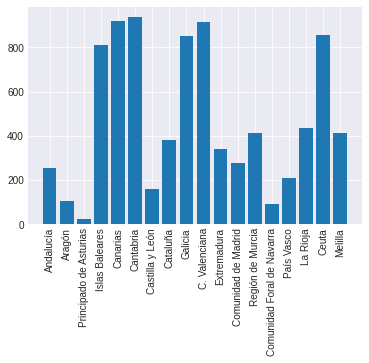

In [31]:
from selenium import webdriver
from lxml import etree
from io import StringIO, BytesIO
import matplotlib.pyplot as plt

# Utilizamos Selenium para obtener el código de la página, pero en este caso la información
# que devolverá incluirá los cambios que se hayan realizado en el DOM tras la ejecución del código
# JavaScript de la página
driver = webdriver.Firefox()
driver.get("https://zerjio.com/temp/covid19.html")

html = driver.page_source

#driver.close()

# print(html)

# A partir de aquí el código es muy muy parecido al del segundo notebook

parserHTML = etree.HTMLParser()
tree = etree.parse(StringIO(html), parserHTML)

tablas = tree.xpath('//table') 

tabla = tablas[1]

comunidades = []
casos = []

filas = tabla.xpath('tbody/tr') 

for f in filas:
    comunidades.append(f[0].text)
    casos.append(int(f[1].text))
    
plt.bar(comunidades, casos)
plt.xticks(rotation=90)
plt.show()

### Interaccionando con páginas web

Selenium nos permite interaccionar con las páginas web tal y como lo haríamos como si estuvieramos navegando manualmente con el navegador. Para ello tiene funciones que nos permiten seleccionar elementos de una página (o de otras partes del interfaz del navegador como pestañas, etc), mandar pulsaciones de teclas, clicks de ratón, etc.

In [32]:
# Ejemplo de búsqueda en un formulario. Este ejemplo dejará de funcionar más pronto 
# que tarde en cuanto AliExpress actualice su página web.
# Actualizado a Marzo de 2022 

from selenium import webdriver
from selenium.webdriver.common.by import By
import time

driver = webdriver.Firefox()
driver.get("https://es.aliexpress.com/")

# Vamos a hacer una búsqueda dentro de AliExpress con el término: "mascarilla con filtro para virus"
# Podemos buscar los elementos con los que interaccionar. Las búsquedas se pueden hacer por id, name o 
# incluso XPATH: https://selenium-python.readthedocs.io/locating-elements.html

time.sleep(1)  # No hace falta, pero para ir viendo poco a poco como se interacciona

# Primero cerramos el cuadro de publicidad que nos sale
# El botón de cerrrar el cuadro de publicacidad es la imagen con clase CSS "btn-close"

botonCerrarCuadroPublicidad = driver.find_element(By.CSS_SELECTOR, ".btn-close")
botonCerrarCuadroPublicidad.click()
driver.switch_to.default_content()  # Volvemos al frame principal

time.sleep(1)


#Buscamos el elemento del formulario de búsqueda (en este caso un <input> con id="search-key").

cuadroTexto = driver.find_element_by_id("search-key")

cuadroTexto.clear()  # Borramos el posible contenido del cuadro de texto
time.sleep(1)
cuadroTexto.send_keys("mascarilla con filtro para virus")
time.sleep(1)

botonLupa = driver.find_element_by_xpath("//input[@class='search-button']")
botonLupa.click()


NoSuchElementException: Message: Unable to locate element: .btn-close
Stacktrace:
WebDriverError@chrome://remote/content/shared/webdriver/Errors.jsm:183:5
NoSuchElementError@chrome://remote/content/shared/webdriver/Errors.jsm:395:5
element.find/</<@chrome://remote/content/marionette/element.js:300:16


In [33]:
# Esperar hasta que aparezca un elemento en la página (por ejemplo si sabemos que
# va a crearse con JavaScript después de un tiempo)
# En este caso Twitter no muestra la barra de búsqueda hasta que pasa un tiempo


from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

import time

driver = webdriver.Firefox()
driver.get("https://twitter.com/explore")

# Esperamos un máximo de 10 segundos hasta que aparezca el input deseado
try:
    busquedaTwitter = WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, "//input[@placeholder='Buscar en Twitter']"))
    )
except:
    print("Error al localizar el elemento")
    driver.quit()
    

busquedaTwitter.clear()
busquedaTwitter.send_keys("Kim Jong Un")
busquedaTwitter.send_keys(Keys.RETURN)


In [34]:
# Selenium tiene muchas más posibilidades: maximizar y minimizar ventanas, jugar con las distintas 
# ventanas y pestañas, cuadros de dialogo, cookies, instalar addons, hacer capturas de pantalla, etc, etc

from selenium import webdriver 
import time

driver = webdriver.Firefox()

time.sleep(1)

for ancho in range(400, 1000, 40):
    alto = ancho * 3 / 4
    driver.set_window_size(ancho, alto)
    driver.set_window_position(1000/2 - ancho/2, 800/2 - alto/2)
    time.sleep(.1)

driver.maximize_window()
time.sleep(1)

driver.get("https://selenium-python.readthedocs.io/")

driver.save_screenshot("salidas/pantallazo.png")


True

### ```Selenium IDE```

Selenium también cuenta con una extensión tanto para *Firefox* como para *Chrome*:

* https://addons.mozilla.org/es/firefox/addon/selenium-ide/
* https://chrome.google.com/webstore/detail/selenium-ide/mooikfkahbdckldjjndioackbalphokd

Dicha extensión facilita la creación de scripts basados en ```Selenium```. Es muy recomendable que la instales y compruebes sus posibilidades.
